<a href="https://colab.research.google.com/github/KK-Niraj/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hotel Booking Analysis**
## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Introduction**
Have you ever wondered about the trends for hotel bookings? How long people stay? How often people cancel? What are the busiest months? In this analysis we explore a large dataset to examine these questions.

# **Methodology**

In this project, We used Python's most useful libraries like Pandas, Matplotlib, Seaborn etc. to examine, cleaning and to analyse the “Hotel Booking Analysis” dataset.

In [1]:
# Import Pandas Package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load the csv file
file_path = '/content/drive/MyDrive/EDA Capstone Projects/Python/'
df = pd.read_csv(file_path + 'Hotel Bookings.csv')

In [4]:
# Checking total rows and columns in data
print(df.shape)

(119390, 32)


In [5]:
# Checking first 15 rows in data
df.head(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2015-04-22


In [6]:
# Checking last 15 rows in data
df.tail(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119375,City Hotel,0,200,2017,August,35,30,1,4,2,...,No Deposit,16.0,NaN,0,Transient,85.50,0,1,Check-Out,2017-09-04
119376,City Hotel,0,165,2017,August,35,29,1,5,3,...,No Deposit,9.0,NaN,0,Transient,209.25,0,3,Check-Out,2017-09-04
119377,City Hotel,0,185,2017,August,35,30,1,4,2,...,No Deposit,9.0,NaN,0,Transient,99.00,0,1,Check-Out,2017-09-04
119378,City Hotel,0,247,2017,August,35,31,1,3,2,...,No Deposit,42.0,NaN,0,Transient,86.85,0,0,Check-Out,2017-09-04
119379,City Hotel,0,109,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,155.00,0,1,Check-Out,2017-09-04
119380,City Hotel,0,44,2017,August,35,31,1,3,2,...,No Deposit,9.0,NaN,0,Transient,140.75,0,1,Check-Out,2017-09-04
119381,City Hotel,0,188,2017,August,35,31,2,3,2,...,No Deposit,14.0,NaN,0,Transient,99.00,0,0,Check-Out,2017-09-05
119382,City Hotel,0,135,2017,August,35,30,2,4,3,...,No Deposit,7.0,NaN,0,Transient,209.00,0,0,Check-Out,2017-09-05
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,NaN,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,2,Check-Out,2017-09-06


# **Dataset**
This dataset contains information on records for client stays at hotels. More specifically, it contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. For the purpose of this post, We only focused on some of these variables to examine.

In [7]:
# Checking basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Exploring descriptive statistical parameter
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# **Data Cleaning**

In [9]:
# Checking the total number of null values in every columns
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
# Column-wise null percentage
print(round(100*(df.isnull().sum()/len(df.index)),2))

hotel                              0.00
is_canceled                        0.00
lead_time                          0.00
arrival_date_year                  0.00
arrival_date_month                 0.00
arrival_date_week_number           0.00
arrival_date_day_of_month          0.00
stays_in_weekend_nights            0.00
stays_in_week_nights               0.00
adults                             0.00
children                           0.00
babies                             0.00
meal                               0.00
country                            0.41
market_segment                     0.00
distribution_channel               0.00
is_repeated_guest                  0.00
previous_cancellations             0.00
previous_bookings_not_canceled     0.00
reserved_room_type                 0.00
assigned_room_type                 0.00
booking_changes                    0.00
deposit_type                       0.00
agent                             13.69
company                           94.31


In [11]:
# Replace the null values of “children” column by 0.
df['children'].fillna(0, inplace = True)

In [12]:
# Replace the null values in the “agent” column by mean of that column.
df['agent'].fillna(df['agent'].mean(), inplace = True)

In [13]:
# Drop the column "company" as it has more than 94% data missing
df = df.drop(['company'],axis=1)

In [14]:
# Country has 488 rows or 0.41% data missing which is negligible, hence we will remove these data.
df = df.dropna(axis=0)

In [15]:
# Ensure that all the null values get replace and there is no null values in any column
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# **Exploratory Analysis and Visualization**

In [16]:
# Counting the total number of values in 'is_canceled' column
is_canceled_counts = df['is_canceled'].value_counts()
is_canceled_counts

0    74745
1    44157
Name: is_canceled, dtype: int64

Text(0, 0.5, 'Booking Cancelled (No = 0, Yes = 1)')

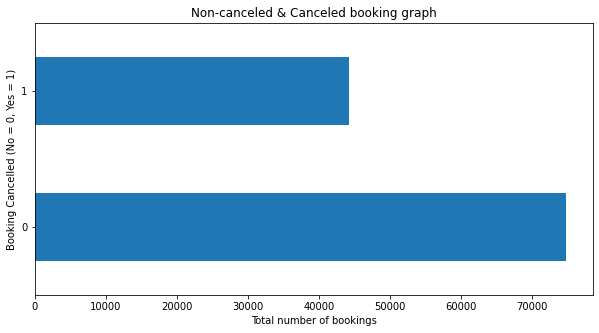

In [17]:
# Plot the graph for total number of bookings vs canceled or non-canceled bookings
plt.rcParams['figure.figsize'] = (10, 5)
is_canceled_counts.plot(kind='barh') 
plt.title('Non-canceled & Canceled booking graph')
plt.xlabel('Total number of bookings')
plt.ylabel('Booking Cancelled (No = 0, Yes = 1)')

*   With the help of this bar graph, we can conclude that 75000 of customers checked-in to the hotel while 44000 of customers canceled their bookings.

In [18]:
# Finding the percentage of booking
booking_percentage= is_canceled_counts/is_canceled_counts.sum()*100
booking_percentage

0    62.862694
1    37.137306
Name: is_canceled, dtype: float64

Text(0.5, 0, 'Booking Cancelled (No = 0, Yes = 1)')

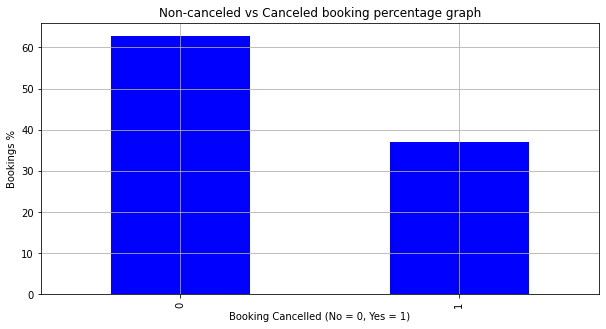

In [19]:
# Plot the graph for non-canceled vs canceled bookings percentage

booking_percentage.plot(kind='bar',color='blue')
plt.grid()
plt.title('Non-canceled vs Canceled booking percentage graph')
plt.ylabel('Bookings %')
plt.xlabel('Booking Cancelled (No = 0, Yes = 1)')
# we can also use pie chart

*   From this graph, We got very meaningful insights that 37% of bookings got canceled Whereas 63% of customers did check-in.

In [20]:
df['deposit_type'].value_counts(normalize=True)

No Deposit    0.876074
Non Refund    0.122563
Refundable    0.001362
Name: deposit_type, dtype: float64

Text(0.5, 0, 'Deposit Type')

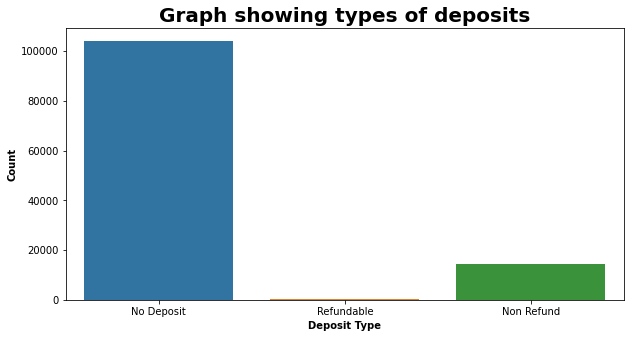

In [21]:
sns.countplot(data = df, x = 'deposit_type')
plt.title('Graph showing types of deposits', fontsize = 20 , weight= 'bold')
plt.ylabel('Count' , weight= 'bold')
plt.xlabel('Deposit Type', weight= 'bold' )

*   More than 85% of hotels have "No Deposit" policy.

## What is the percentage of booking for each year?

In [22]:
# Calculate total number of bookings acorss different years 
year_counts = df['arrival_date_year'].value_counts().sort_index()
year_counts

2015    21863
2016    56435
2017    40604
Name: arrival_date_year, dtype: int64

Text(0.5, 0, 'Years')

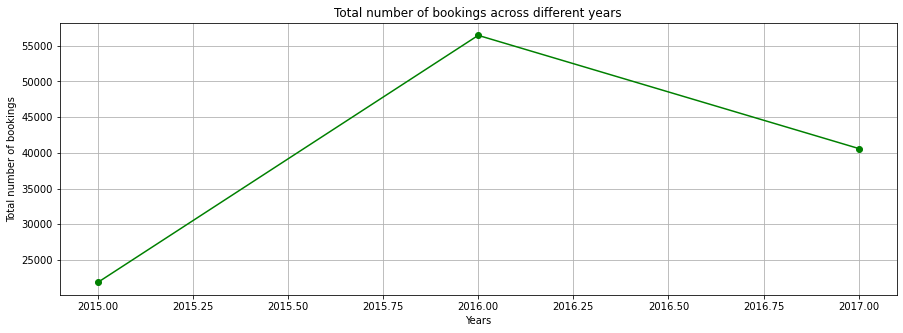

In [23]:
# Plot the graph for years vs total bookings
plt.rcParams['figure.figsize'] = (15, 5)
year_counts.plot(kind='line',color='green',marker='o')
plt.grid()
plt.title('Total number of bookings across different years')
plt.ylabel('Total number of bookings')
plt.xlabel('Years')

*   This plot clearly represents that bookings in year 2016 was highest compared to other years which is near about more than 56500. In year 2017 bookings fell down as compared to last year i.e. 40600 but this value was still quite better than it was in 2015 only about 22000.

In [24]:
df['arrival_date_year'].value_counts(normalize=True)

2016    0.474635
2017    0.341491
2015    0.183874
Name: arrival_date_year, dtype: float64

Text(0, 0.5, 'Total Bookings')

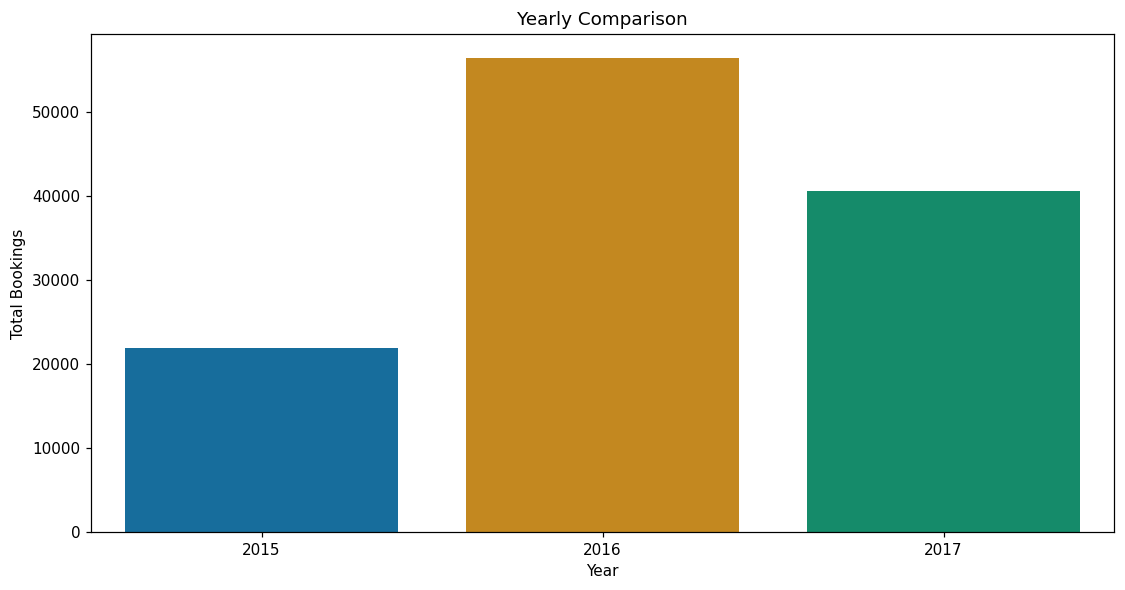

In [25]:
plt.figure(figsize = (12,6), dpi=110)
sns.countplot(x='arrival_date_year', data=df, palette='colorblind')
plt.title('Yearly Comparison')
plt.xlabel('Year')
plt.ylabel('Total Bookings')

Text(0, 0.5, 'Count')

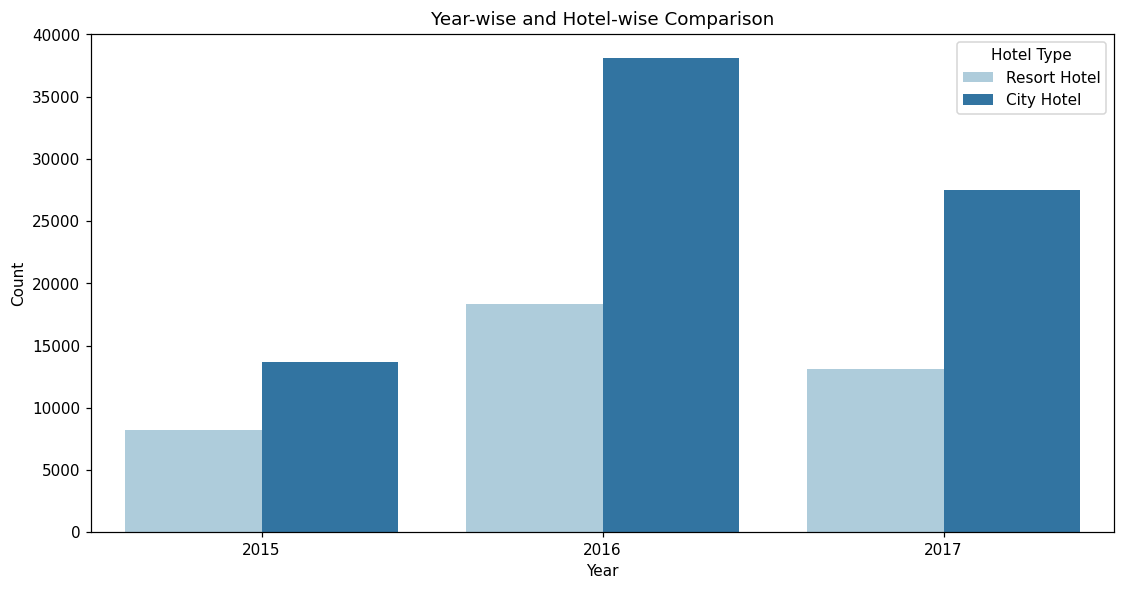

In [26]:
plt.figure(figsize = (12,6), dpi=110)
sns.countplot(x='arrival_date_year', hue='hotel', data=df, palette='Paired')
plt.title('Year-wise and Hotel-wise Comparison')
plt.legend(title='Hotel Type')
plt.xlabel('Year')
plt.ylabel('Count')

*   Here, We can analyse that city hotels always have higher demand as compared to resort hotels.

In [27]:
# Let us find out night stay duration of customers
total_nights_stays = (df['stays_in_weekend_nights']+ df['stays_in_week_nights']).value_counts().head(10).sort_index()
total_nights_stays

1     20797
2     27531
3     27025
4     17363
5      7765
6      3850
7      8634
8      1157
10     1135
14      913
dtype: int64

Text(0.5, 0, 'Number of nights')

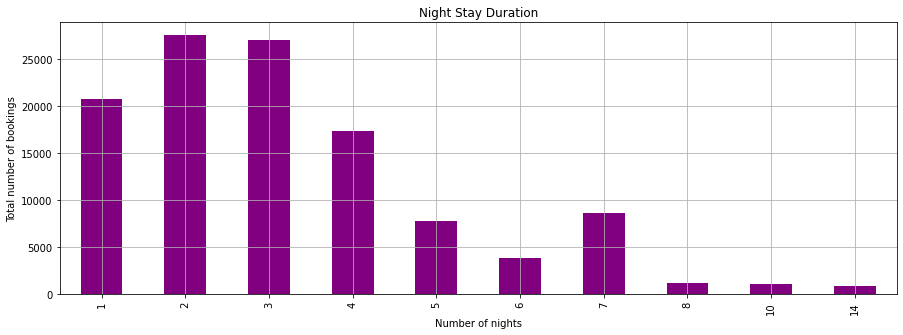

In [28]:
# Plot the graph of number of nights people wants to stay against total number of bookings
total_nights_stays.plot.bar(color='purple')
plt.rcParams['figure.figsize'] = (10,5)
plt.grid()
plt.title('Night Stay Duration')
plt.ylabel('Total number of bookings')
plt.xlabel('Number of nights')

*   Most of the customers prefer to stay one, two, three and four nights whereas , number of bookings for two and three nights has higher demand comapratively.
*   If we try to analyse the optimal length to stay in order to get best daily rate, we can say that two to four days of accomodation can be more affordable since more people prefer the same, the hotels also launch the offers for mid term accomodation because long term stay offers will consume their rooms and new customers can not avail the rooms and hotels may fail to generate extra profits.

Text(0, 0.5, 'Count')

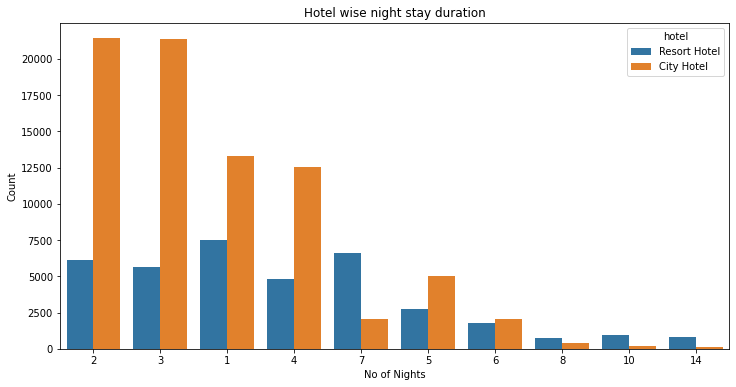

In [29]:
# Observing peoples interest to stay according to type of hotel with graph
df.loc[:,'total_nights'] = df['stays_in_weekend_nights']+ df['stays_in_week_nights']

fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(x='total_nights', hue='hotel', data=df,
              order = df.total_nights.value_counts().iloc[:10].index)
ax.set_title('Hotel wise night stay duration')
ax.set_xlabel('No of Nights')
ax.set_ylabel('Count')

*   According to this visual representation, people are interested in city hotel to stay for two, three, one and four days respectively whereas for resort hotel people are interested to stay one, seven, two and three days respectively.

## Most booked accommodation type - Single, Couple, Family

In [79]:
# Select single, couple, multiple adults and family
df_not_canceled = df[df['is_canceled'] == 0]

# Select single, couple, multiple adults and family
single   = df_not_canceled[(df_not_canceled.adults == 1) & (df_not_canceled.children == 0) & (df_not_canceled.babies == 0)]
couple   = df_not_canceled[(df_not_canceled.adults == 2) & (df_not_canceled.children == 0) & (df_not_canceled.babies == 0)]
family   = df_not_canceled[df_not_canceled.adults + df_not_canceled.children + df_not_canceled.babies > 2]

In [98]:
# Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df_not_canceled.shape[0]*100 for x in count]
d = {'names':names,'count_percent':count_percent}
acc_type = pd.DataFrame(data = d)

In [99]:
acc_type

,names,count_percent
0,Single,21.064954
1,Couple (No Children),65.569603
2,Family / Friends,12.693826


Text(0, 0.5, 'Booking (%)')

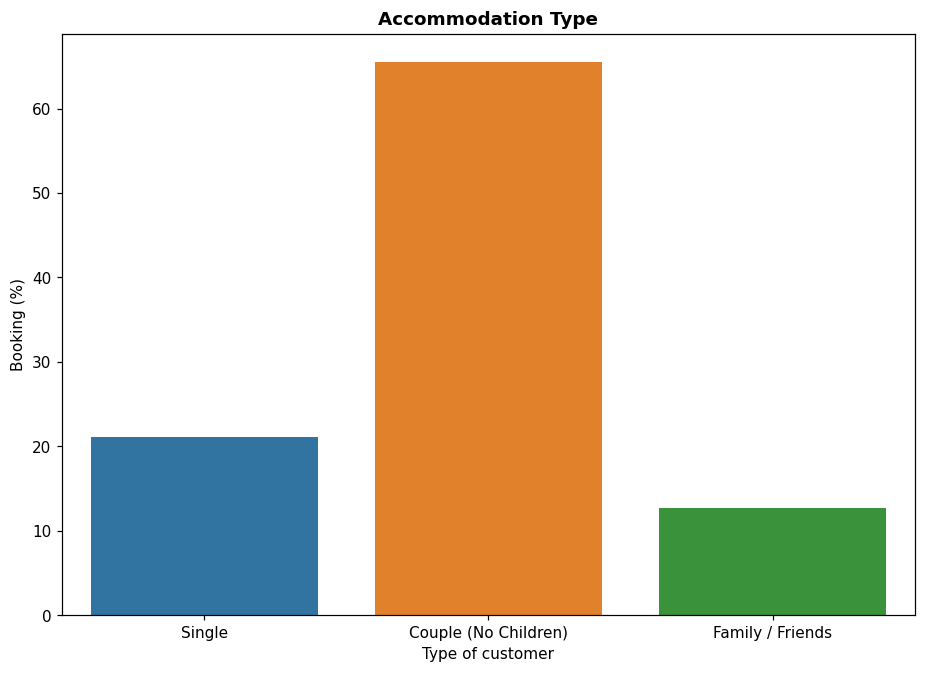

In [102]:
# Draw the curve
plt.figure(figsize = (10,7), dpi=110)
sns.barplot(data = acc_type, x = 'names', y = 'count_percent')
plt.title('Accommodation Type', weight = 'bold')
plt.xlabel('Type of customer')
plt.ylabel('Booking (%)')

## Arriving Year, Leadtime and Cancellations

Text(0, 0.5, 'Lead Time')

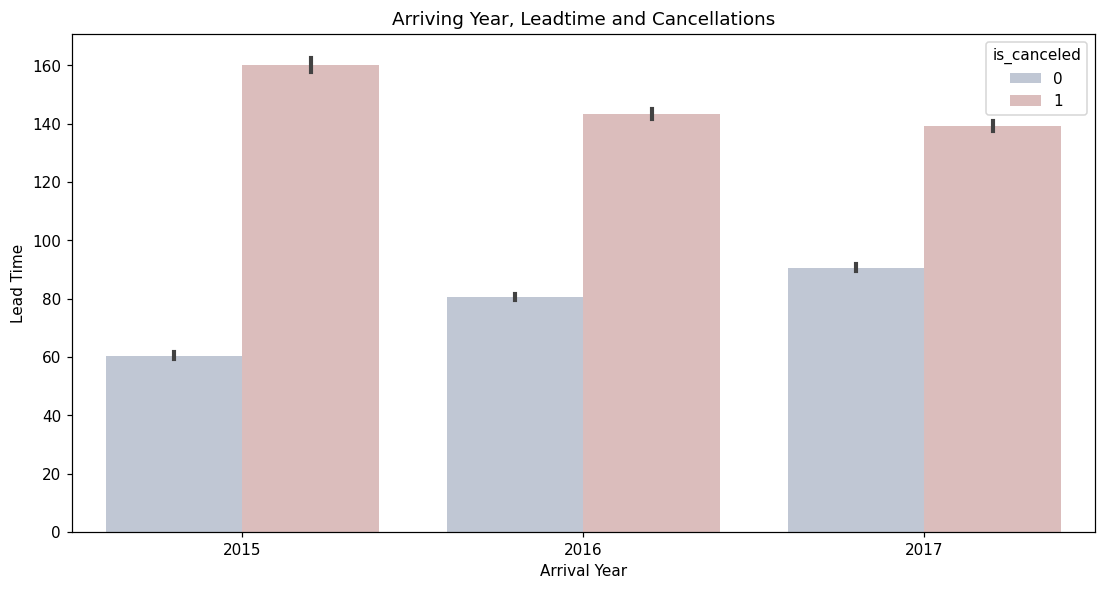

In [30]:
plt.figure(figsize = (12,6), dpi=110)
sns.barplot(x='arrival_date_year', y='lead_time', hue='is_canceled', data=df, palette='vlag')
plt.title('Arriving Year, Leadtime and Cancellations')
plt.xlabel('Arrival Year')
plt.ylabel('Lead Time')

## Arriving Date and Week Number

Text(0, 0.5, 'Count')

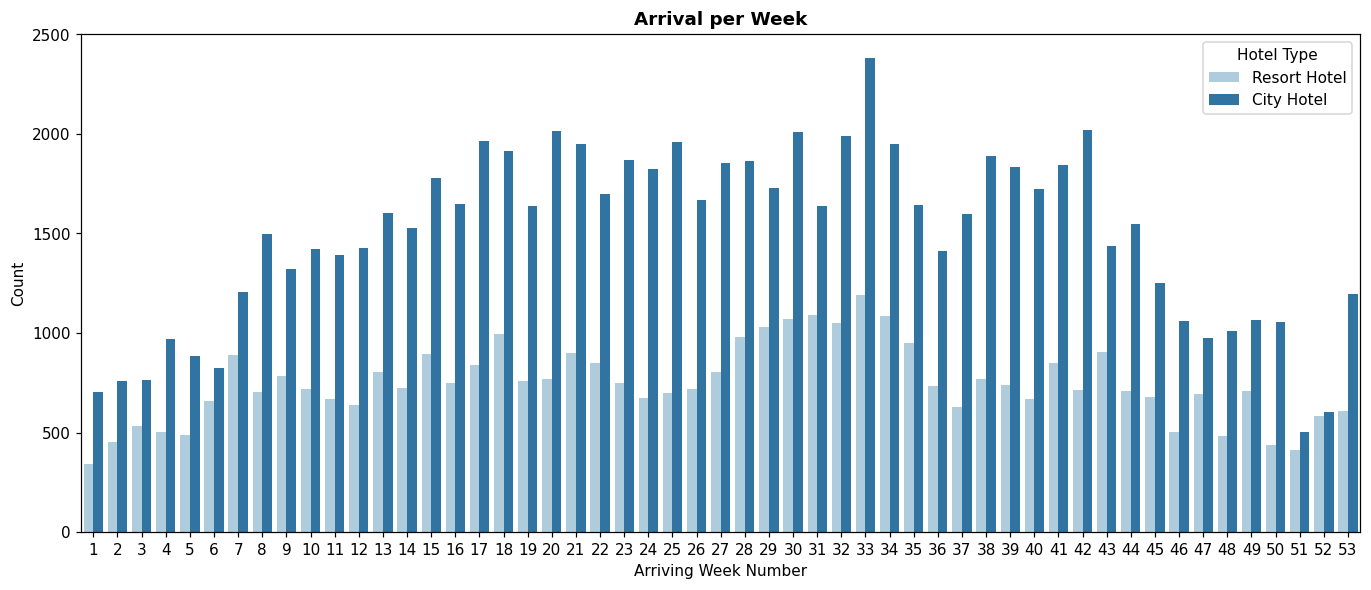

In [31]:
plt.figure(figsize = (15,6), dpi=110)
sns.countplot(x='arrival_date_week_number', hue='hotel', data=df, palette='Paired')
plt.title('Arrival per Week', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arriving Week Number')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

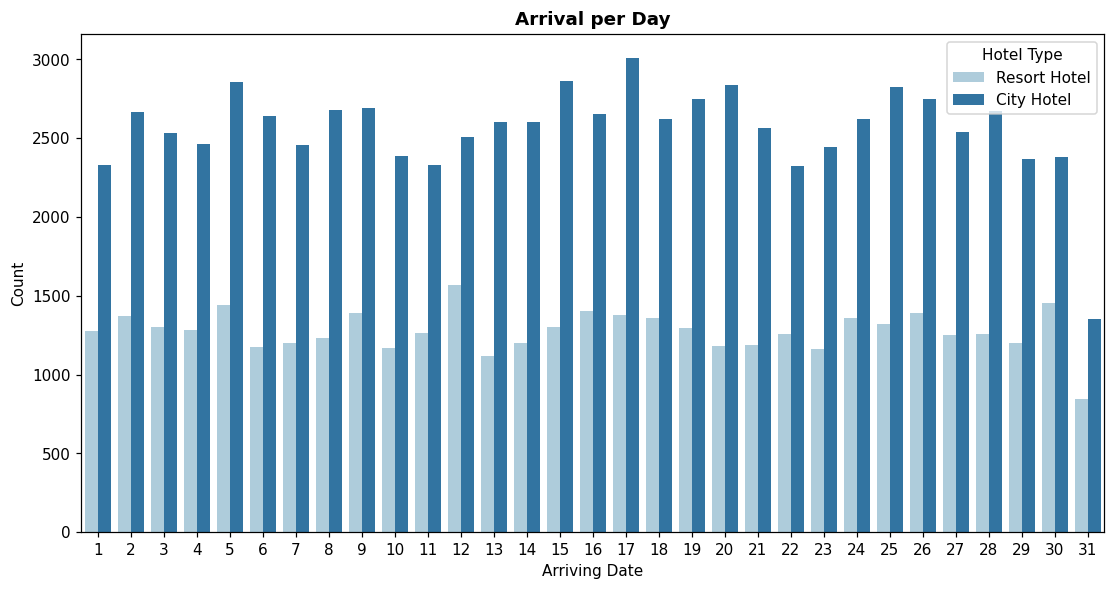

In [32]:
plt.figure(figsize = (12,6), dpi=110)
sns.countplot(x='arrival_date_day_of_month', hue='hotel', data=df, palette='Paired')
plt.title('Arrival per Day', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arriving Date')
plt.ylabel('Count')

## Which month is the most occupied with Bookings at Hotel

In [33]:
df['arrival_date_month'].value_counts(normalize=True)

August       0.116533
July         0.106205
May          0.099065
October      0.093312
April        0.092892
June         0.091899
September    0.088030
March        0.081908
February     0.067383
November     0.056786
December     0.056584
January      0.049402
Name: arrival_date_month, dtype: float64

Text(0, 0.5, 'Count')

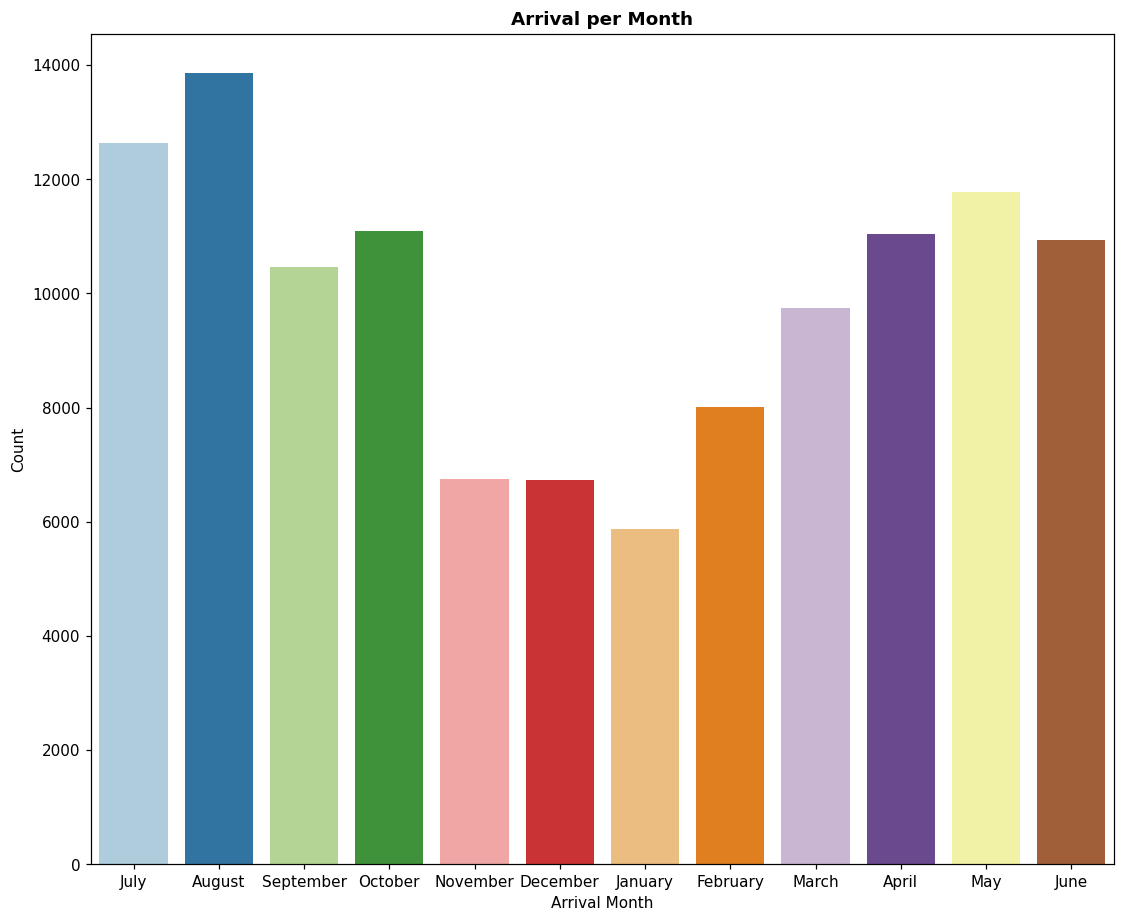

In [34]:
plt.figure(figsize = (12,10), dpi=110)
sns.countplot(x = 'arrival_date_month', data = df, palette='Paired')
plt.title('Arrival per Month', weight='bold')
plt.xlabel('Arrival Month')
plt.ylabel('Count')

*   From this graph of Arrival Month and count, we can conclude that highest number of customers are in August month followed by July, May, October and so on and so forth ,while January has the lowest rate of customers.

*   Since the month of January has the lowest amount of booking, it can be the best time of year to book a hotel room. Due to less demand of rooms, the cost for room on daily basis also minimum as compared to other months where month of August has high demand for room so it is obvious that the cost of room is also at peak.



Text(0, 0.5, 'Count')

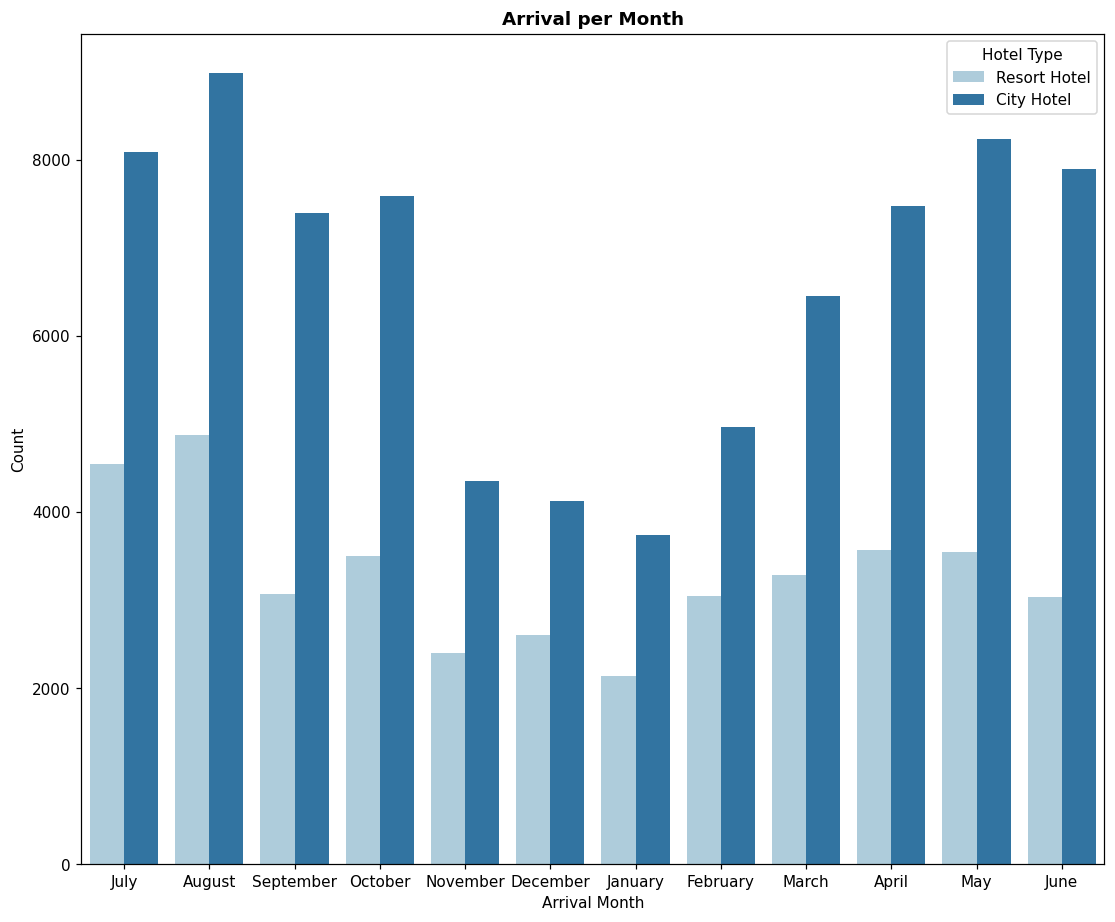

In [35]:
plt.figure(figsize = (12,10), dpi=110)
sns.countplot(x = 'arrival_date_month', data = df, hue ='hotel',  palette='Paired')
plt.title('Arrival per Month', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('Count')

*   The above graph depicts the number of bookings created for each month
*   According to the graph, August is the most occupied (busiest) month


## Which month have cheaper booking rates

Text(0, 0.5, 'ADR (Arrival Daily Rate)')

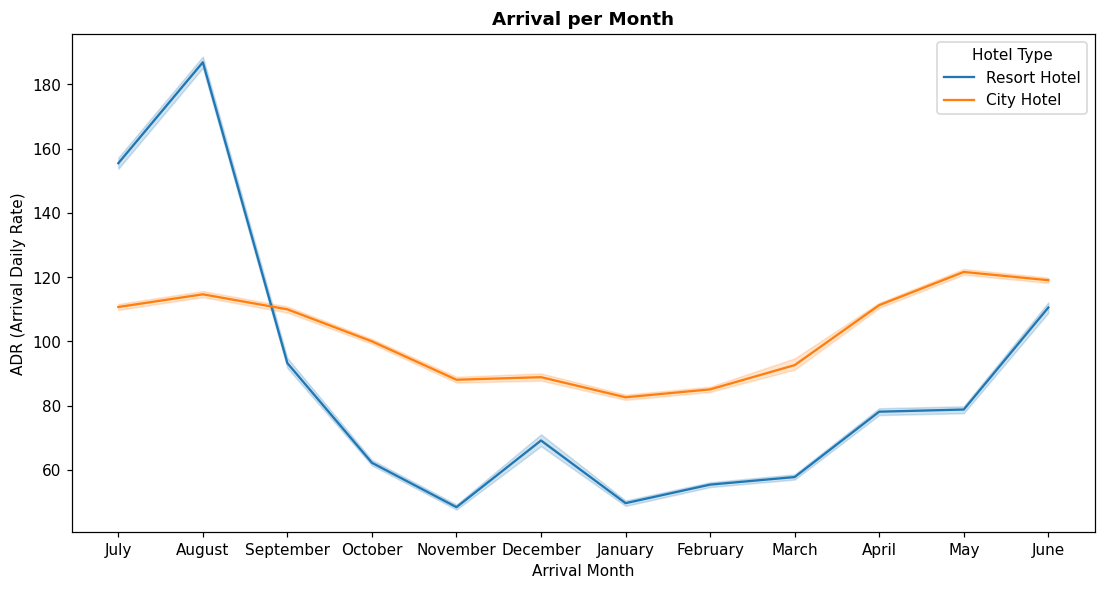

In [36]:
plt.figure(figsize = (12,6), dpi=110)
sns.lineplot(x = 'arrival_date_month', y='adr', data = df, hue ='hotel')
plt.title('Arrival per Month', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Arrival Month')
plt.ylabel('ADR (Arrival Daily Rate)')

*   For Resort Hotel, the price per night (ADR) is more expensive during July, August & September

*   For City Hotel, the price per night (ADR) is slightly more during March, April & May



## No. of customer who repeated their bookings

In [37]:
df['is_repeated_guest'].value_counts(normalize=True)

0    0.96799
1    0.03201
Name: is_repeated_guest, dtype: float64

Text(0, 0.5, 'Count')

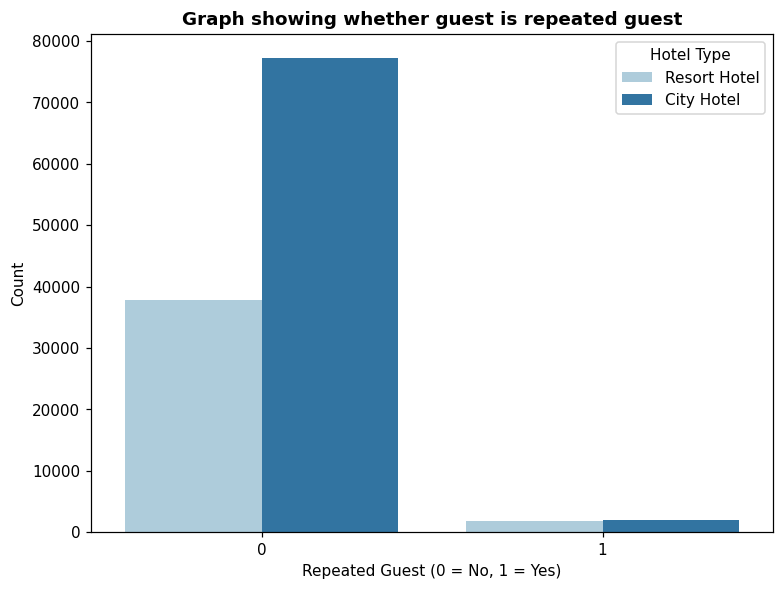

In [38]:
plt.figure(figsize = (8,6), dpi=110)
sns.countplot(x = 'is_repeated_guest', data = df, hue ='hotel',  palette='Paired')
plt.title('Graph showing whether guest is repeated guest', weight='bold')
plt.legend(title='Hotel Type')
plt.xlabel('Repeated Guest (0 = No, 1 = Yes)')
plt.ylabel('Count')

## Top 10 Countries of Origin

In [39]:
# Fetching top 10 countries of maximum customers
country_counts=df['country'].value_counts().head(10)
country_counts

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: country, dtype: int64

Text(0.5, 0, 'countries')

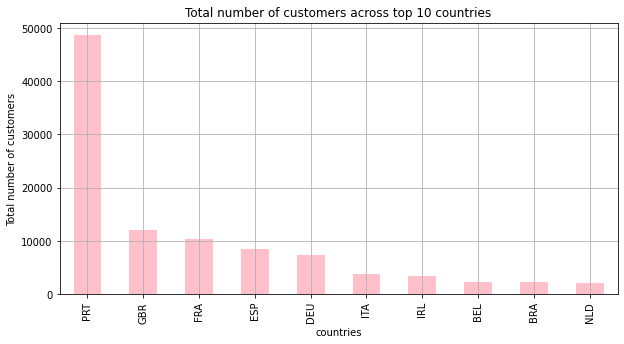

In [40]:
# plot the graph for maximum number of customers from different countries
country_counts.plot(kind='bar', color = 'Pink')
plt.rcParams['figure.figsize'] = (10,5)
plt.grid()
plt.title('Total number of customers across top 10 countries')
plt.ylabel('Total number of customers')
plt.xlabel('countries')

*   This graph show information about the countries that have most bookings. Most of bookings are created from Portugal and then Great Britain in second place and France.


In [41]:
df['country'].value_counts(normalize=True).head(10) * 100

PRT    40.865587
GBR    10.200838
FRA     8.759314
ESP     7.205934
DEU     6.128576
ITA     3.167314
IRL     2.838472
BEL     1.969689
BRA     1.870448
NLD     1.769524
Name: country, dtype: float64



*   Portugal (PRT) has the highest number of customers among these top 10 countries list. UK, France, Spain and Germany are at second, third, fourth and fifth positions accordingly in terms of amount of customers.Since Netherlands (NLD) has the lowest number of customers.



## Customer Type

In [42]:
df['customer_type'].value_counts(normalize=True)

Transient          0.749979
Transient-Party    0.210947
Contract           0.034280
Group              0.004794
Name: customer_type, dtype: float64

Text(0, 0.5, 'Customer Count')

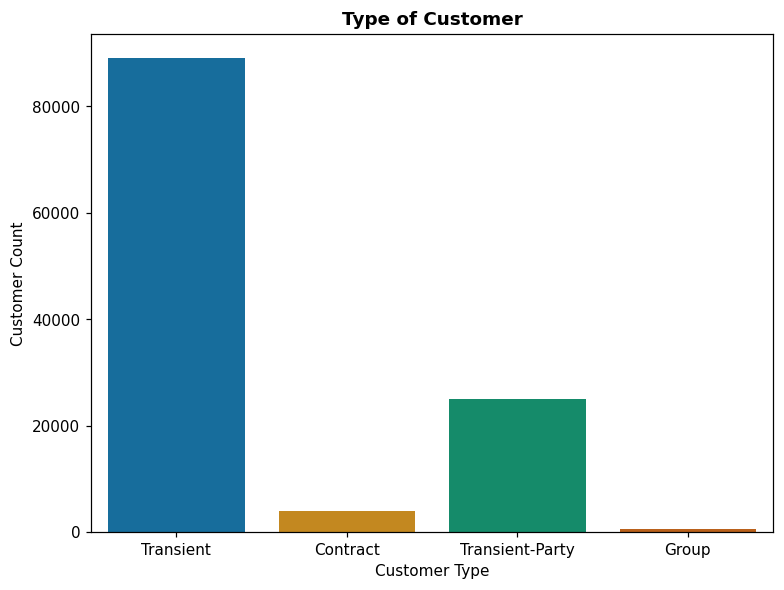

In [43]:
plt.figure(figsize = (8,6), dpi=110)
sns.countplot(x = 'customer_type', data = df, palette='colorblind')
plt.title('Type of Customer', weight='bold')
plt.xlabel('Customer Type')
plt.ylabel('Customer Count')

In [44]:
# Ensuring the type of customer
customer_type = df.customer_type.value_counts()
customer_type

Transient          89174
Transient-Party    25082
Contract            4076
Group                570
Name: customer_type, dtype: int64

Text(0.5, 1.0, 'Customer type')

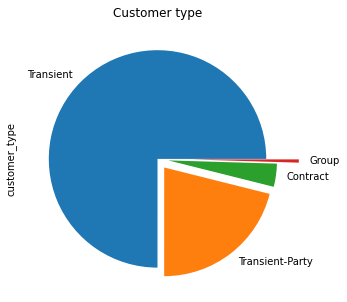

In [45]:
# Pie chart for type of customer
myexplode = [0, 0.1, 0.1, 0.3]
customer_type.plot(kind='pie',explode = myexplode)
plt.title('Customer type')

Type of booking:

1.   **Contract** — when the booking has an allotment or other type of contract associated to it
2.   **Group** — when the booking is associated to a group
3.   **Transient** — when the booking is not part of a group or contract, and is not associated to other transient booking
4.   **Transient-party** — when the booking is transient, but is associated to at least other transient booking





Transient type of customer is the main source of booking because more than 75% of booking coming from this side after that Transient-Party, Contract and Group are coming in the focus.

## Market Segment Types

In [46]:
df['market_segment'].value_counts(normalize=True)

Online TA        0.474365
Offline TA/TO    0.203193
Groups           0.166574
Direct           0.104700
Corporate        0.042985
Complementary    0.006173
Aviation         0.001993
Undefined        0.000017
Name: market_segment, dtype: float64

Text(0, 0.5, 'Count')

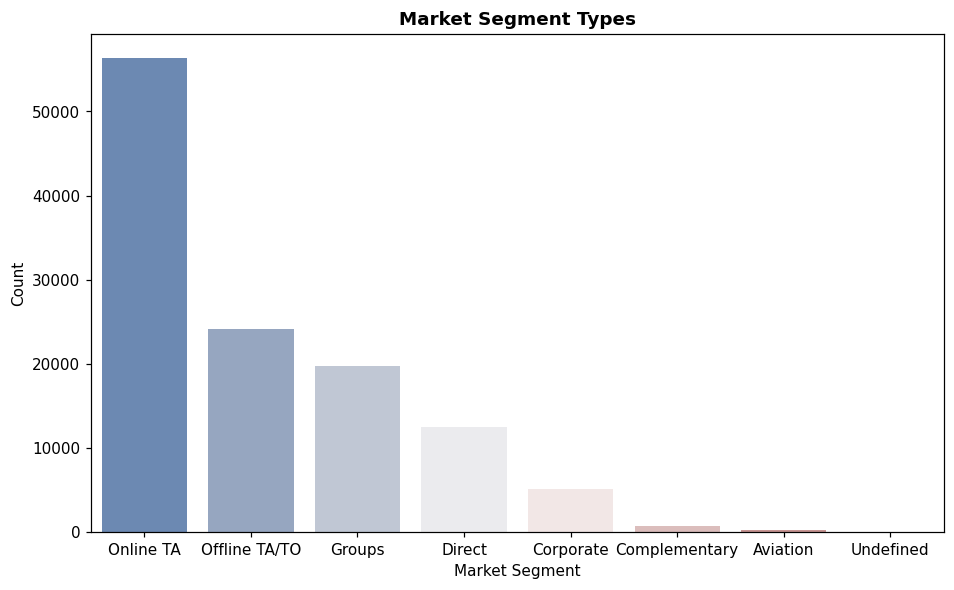

In [47]:
plt.figure(figsize = (10,6), dpi=110)
sns.barplot(x = df['market_segment'].value_counts().index,y = df['market_segment'].value_counts().values, palette='vlag')
plt.title('Market Segment Types', weight='bold')
plt.xlabel('Market Segment')
plt.ylabel('Count')

In [48]:
# Find out total number of customers across various market segments
market_segment_customers=df.market_segment.value_counts()
market_segment_customers

Online TA        56403
Offline TA/TO    24160
Groups           19806
Direct           12449
Corporate         5111
Complementary      734
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

Text(0.5, 0, 'Market Segment')

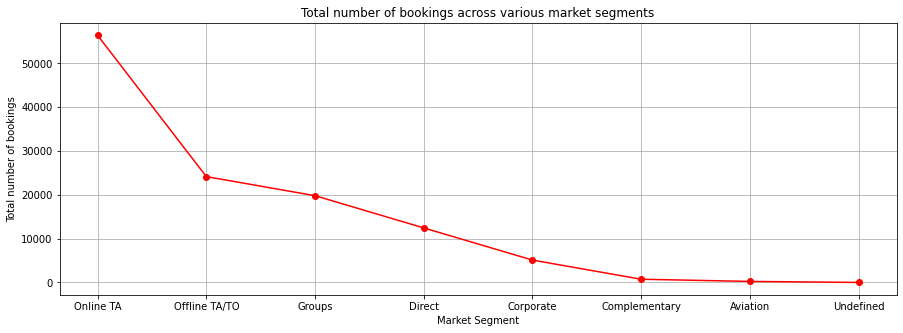

In [49]:
# Plotting market segments with total number of customers
plt.rcParams['figure.figsize'] = (15, 5)
market_segment_customers.plot(kind='line',color='red',marker='o')
plt.grid()
plt.title('Total number of bookings across various market segments')
plt.ylabel('Total number of bookings')
plt.xlabel('Market Segment')

*   Online TA (Travel Agency) segment gives high amount of customers and then Offline TA/TO, Groups,Direct etc. respectively.
*   So , from this we concluded that We can target our marketing area to be focus on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

## Meal Type

In [50]:
# Analysing interest of customer in meal category
meal_cat = df.meal.value_counts()
meal_cat

BB           91867
HB           14434
SC           10638
Undefined     1165
FB             798
Name: meal, dtype: int64

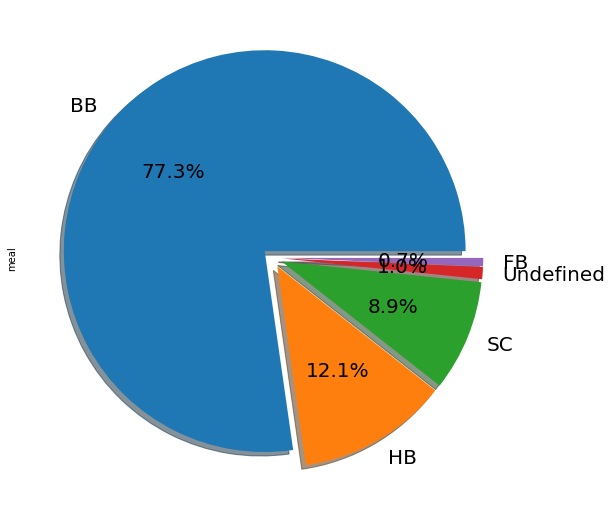

In [105]:
df['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(9,15),fontsize=20)

Text(0.5, 1.0, 'Category of meal in which customer interested more')

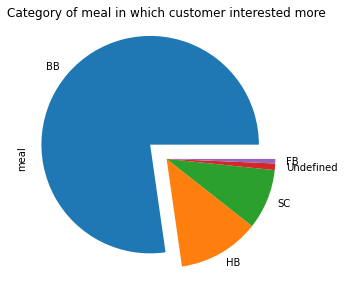

In [51]:
# Drawing a pie chart to conclude customers interest in meal category
myexplode = [0.2, 0, 0, 0, 0]
meal_cat.plot(kind='pie',explode = myexplode)
plt.title('Category of meal in which customer interested more')

Type of meal booked:


*   **Undefined/SC** — no meal package
*   **BB** — Bed & Breakfast
*   **HB** — Half board (breakfast and one other meal — usually dinner)
*   **FB** — Full board (breakfast, lunch and dinner)

From above pie chart, it is clearly explain that BB type of meal category is the most preferable in all type of customers.

## Exploring Number of Special Requests

In [52]:
df['total_of_special_requests'].value_counts(normalize=True)

0    0.588644
1    0.278582
2    0.108686
3    0.020916
4    0.002851
5    0.000320
Name: total_of_special_requests, dtype: float64

Text(0, 0.5, 'Count')

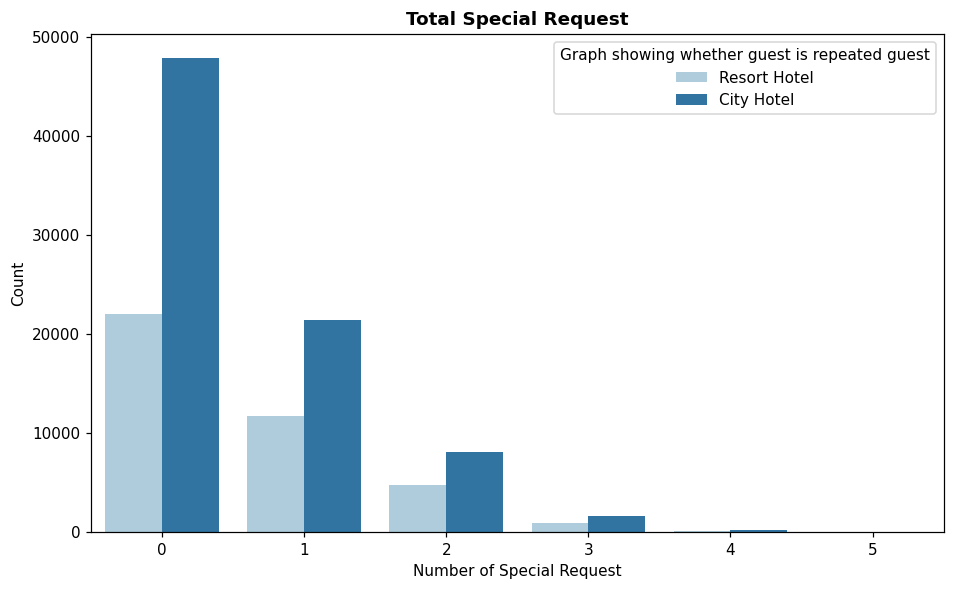

In [53]:
plt.figure(figsize = (10,6), dpi=110)
sns.countplot(x = 'total_of_special_requests', data = df, hue ='hotel',  palette='Paired')
plt.title('Total Special Request', weight='bold')
plt.legend(title='Graph showing whether guest is repeated guest')
plt.xlabel('Number of Special Request')
plt.ylabel('Count')

*   From the above graph we can depict that around 58.8% bookings do not 
have any special requests from the guests


Text(0, 0.5, 'Reservation Count')

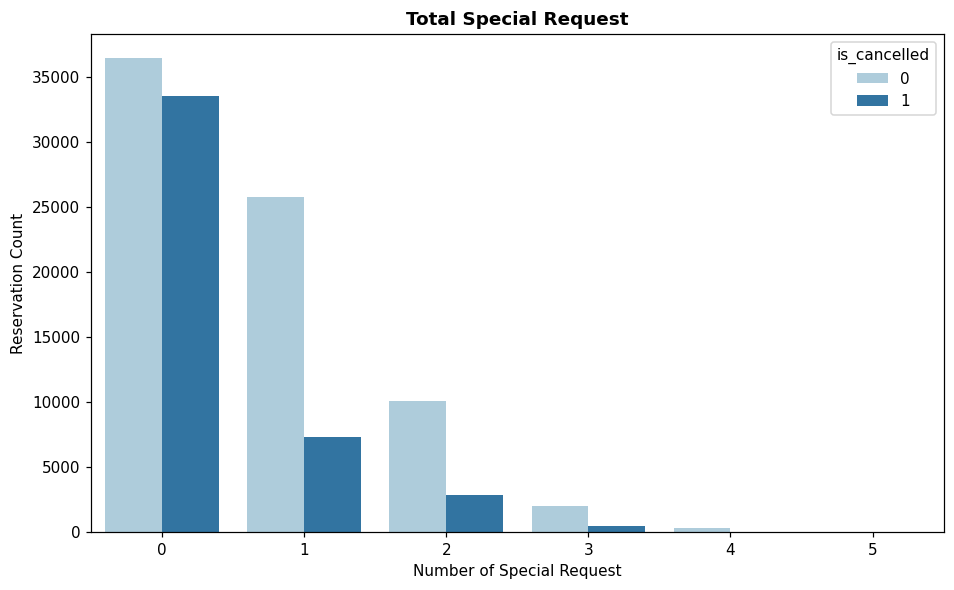

In [54]:
plt.figure(figsize = (10,6), dpi=110)
sns.countplot(x = 'total_of_special_requests', data = df, hue ='is_canceled',  palette='Paired')
plt.title('Total Special Request', weight='bold')
plt.legend(title='is_cancelled')
plt.xlabel('Number of Special Request')
plt.ylabel('Reservation Count')

*   The Above graph depicts the relationship between total number of special requests and cancellation booking status.
*   Around 28% of bookings were cancelled with no special requests from the 
guests followed by 6% bookings were cancelled with one special requests from the guests.



## Feature Selection and Feature Engineering

In [55]:
df_subset = df.copy()

In [56]:
df_subset = df_subset.drop(df_subset[(df_subset.adults+df_subset.babies+df_subset.children)==0].index)

In [57]:
df_subset['Room'] = 0

In [58]:
df_subset.loc[df_subset['reserved_room_type'] == df_subset['assigned_room_type'],'Room'] = 1

In [59]:
df_subset['net_cancelled'] = 0

In [60]:
df_subset.loc[df_subset['previous_cancellations'] > df_subset['previous_bookings_not_canceled'],'net_cancelled'] = 1

In [61]:
df_subset = df_subset.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month',
                            'arrival_date_month','assigned_room_type','reserved_room_type','reservation_status_date',
                            'previous_cancellations','previous_bookings_not_canceled'],axis=1)

In [62]:
df_subset = df_subset.drop(['reservation_status'],axis=1)

In [63]:
df_subset.corr()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,Room,net_cancelled
is_canceled,1.000000,0.291548,-0.002230,0.024796,0.056157,0.004523,-0.032608,-0.084146,-0.145147,-0.077270,0.054105,0.044819,-0.195018,-0.235874,0.017651,0.245747,0.292489
lead_time,0.291548,1.000000,0.084331,0.165912,0.114995,-0.038571,-0.021228,-0.123859,0.002137,-0.064789,0.169936,-0.068124,-0.115697,-0.096734,0.157077,0.138366,0.233701
stays_in_weekend_nights,-0.002230,0.084331,1.000000,0.490102,0.093379,0.045781,0.018523,-0.086585,0.049224,0.133285,-0.054808,0.048720,-0.018097,0.072131,0.758833,0.077239,-0.046251
stays_in_week_nights,0.024796,0.165912,0.490102,1.000000,0.095391,0.044723,0.020343,-0.096017,0.079335,0.172259,-0.002158,0.065362,-0.024429,0.067353,0.939608,0.092613,-0.049282
adults,0.056157,0.114995,0.093379,0.095391,1.000000,0.028597,0.017640,-0.141923,-0.042077,-0.028630,-0.008817,0.221365,0.016101,0.122447,0.107938,0.050399,-0.007229
children,0.004523,-0.038571,0.045781,0.044723,0.028597,1.000000,0.024102,-0.032600,0.050720,0.039509,-0.033414,0.325228,0.057061,0.081802,0.051391,0.011710,-0.051740
babies,-0.032608,-0.021228,0.018523,0.020343,0.017640,0.024102,1.000000,-0.008823,0.085390,0.033694,-0.010653,0.028458,0.036979,0.097650,0.022473,-0.019481,-0.015418
is_repeated_guest,-0.084146,-0.123859,-0.086585,-0.096017,-0.141923,-0.032600,-0.008823,1.000000,0.013129,0.020921,-0.022141,-0.131804,0.078621,0.013070,-0.105738,-0.082230,0.053101
booking_changes,-0.145147,0.002137,0.049224,0.079335,-0.042077,0.050720,0.085390,0.013129,1.000000,0.061427,-0.011937,0.026287,0.067603,0.054611,0.078604,-0.088290,-0.068484
agent,-0.077270,-0.064789,0.133285,0.172259,-0.028630,0.039509,0.033694,0.020921,0.061427,1.000000,-0.054906,-0.022586,0.152035,0.031931,0.181041,-0.076031,-0.108203


In [64]:
# df_subset = df_subset.drop(['children'],axis=1) # Check this part

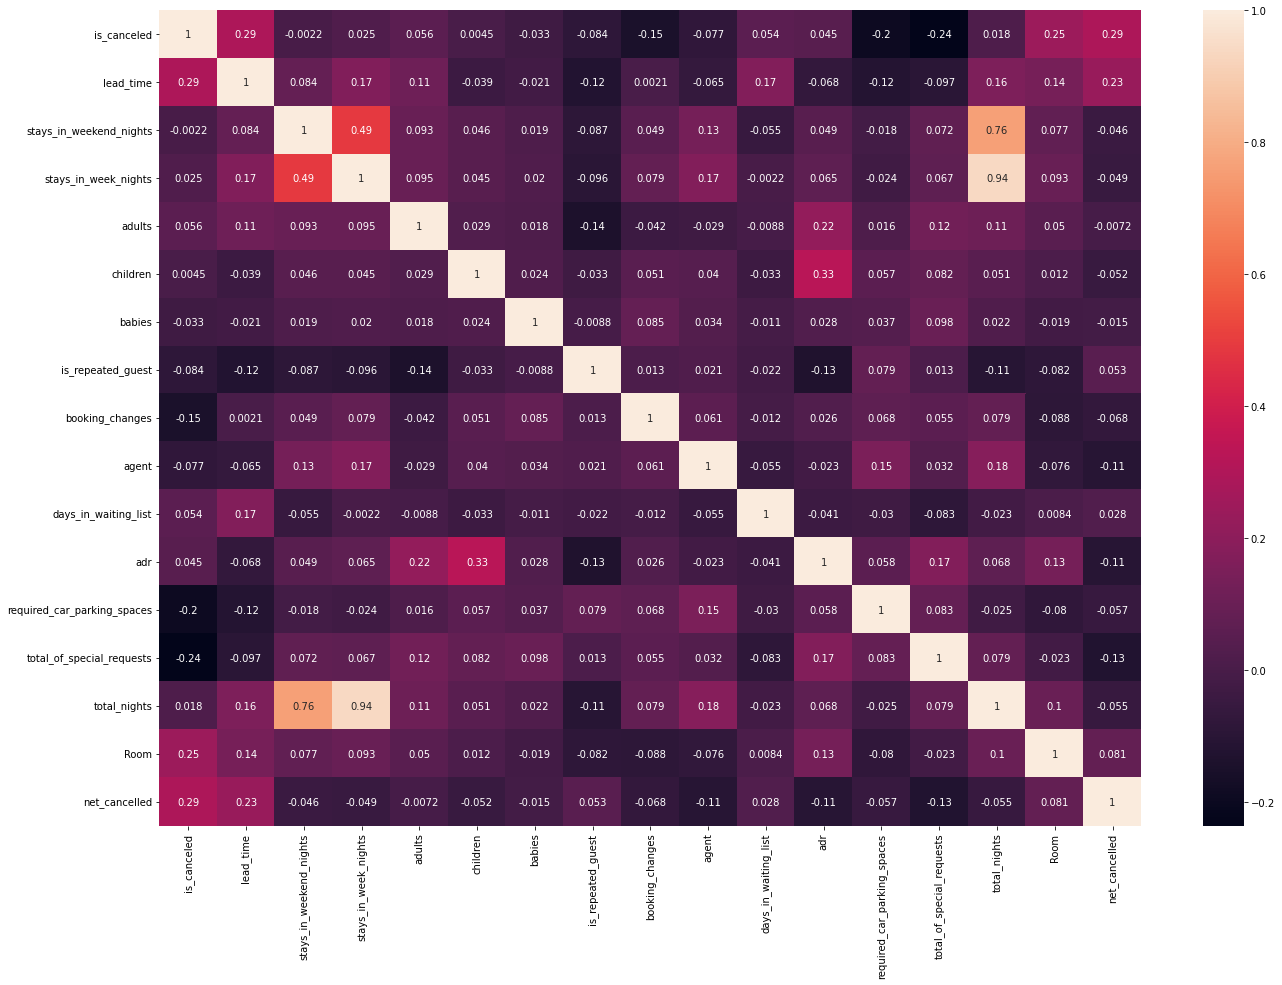

In [65]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_subset.corr(),annot=True,ax=ax)

In [66]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [67]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [68]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)